<a href="https://colab.research.google.com/github/Cyber-Squid1/PyTorch/blob/main/First_NeuralNetwork_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Define Hyperparameters
in_size=784 # 28*28
hidden_size=100
lr=0.001
n_classes=10
batch_size=100
n_epochs=4

In [4]:
# import MNIST dataset
train_data=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_data=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 333005296.31it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 59351148.37it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 156457511.86it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20957677.41it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# create dataloaders
train_loader=torch.utils.data.DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size,shuffle=False)

In [6]:
examples = iter(train_loader)
samples, labels=next(examples)
print("Samples shape= ",samples.shape)
print("Labels shape= ",labels.shape)

Samples shape=  torch.Size([100, 1, 28, 28])
Labels shape=  torch.Size([100])


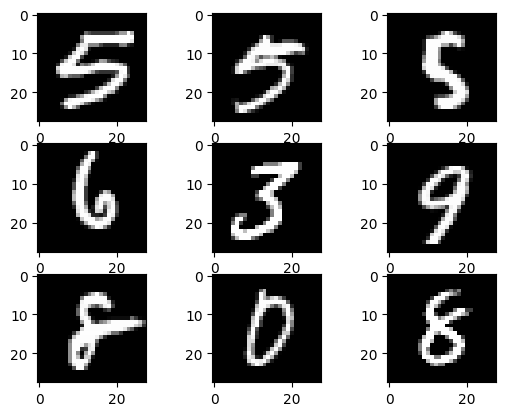

In [7]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [8]:
class NeuralNetworkMNIST(nn.Module):
    def __init__(self,in_size,hidden_size,n_classes):
        super(NeuralNetworkMNIST,self).__init__()
        self.l1=nn.Linear(in_features=in_size,out_features=hidden_size)
        self.relu1=nn.ReLU()
        self.l2=nn.Linear(in_features=hidden_size,out_features=hidden_size)
        self.relu2=nn.ReLU()
        self.l3=nn.Linear(in_features=100,out_features=n_classes)

    def forward(self,x):
        z=self.l1(x)
        z=self.relu1(z)
        z=self.l2(z)
        z=self.relu2(z)
        z=self.l3(z)
        return z

model=NeuralNetworkMNIST(in_size,hidden_size,n_classes)
model=model.to(device)

In [9]:
# Loss and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr)

In [10]:
# Training Loop
n_steps=len(train_loader)

for epoch in range(n_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)

        # Forward Pass
        output=model(images)
        loss=criterion(output,labels)

        # Backward Pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f' epoch: {epoch+1} / {n_epochs} , step: {i+1} / {n_steps} , loss: {loss.item():.6f}')


 epoch: 1 / 4 , step: 100 / 600 , loss: 0.522368
 epoch: 1 / 4 , step: 200 / 600 , loss: 0.316545
 epoch: 1 / 4 , step: 300 / 600 , loss: 0.281152
 epoch: 1 / 4 , step: 400 / 600 , loss: 0.177521
 epoch: 1 / 4 , step: 500 / 600 , loss: 0.276793
 epoch: 1 / 4 , step: 600 / 600 , loss: 0.235847
 epoch: 2 / 4 , step: 100 / 600 , loss: 0.382467
 epoch: 2 / 4 , step: 200 / 600 , loss: 0.162439
 epoch: 2 / 4 , step: 300 / 600 , loss: 0.307577
 epoch: 2 / 4 , step: 400 / 600 , loss: 0.088166
 epoch: 2 / 4 , step: 500 / 600 , loss: 0.104588
 epoch: 2 / 4 , step: 600 / 600 , loss: 0.141398
 epoch: 3 / 4 , step: 100 / 600 , loss: 0.156885
 epoch: 3 / 4 , step: 200 / 600 , loss: 0.087375
 epoch: 3 / 4 , step: 300 / 600 , loss: 0.152191
 epoch: 3 / 4 , step: 400 / 600 , loss: 0.102634
 epoch: 3 / 4 , step: 500 / 600 , loss: 0.061939
 epoch: 3 / 4 , step: 600 / 600 , loss: 0.098438
 epoch: 4 / 4 , step: 100 / 600 , loss: 0.095016
 epoch: 4 / 4 , step: 200 / 600 , loss: 0.074035
 epoch: 4 / 4 , step

In [11]:
# Testing and Evaluation
with torch.no_grad():
    n_correct=0
    n_samples=0
    for images, labels in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        output=model(images)

        # torch.max() return value, index we are only interested in index so value is given as _
        _, predictions=torch.max(output,1) # returns maximum value from output tensor along column 1
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f' accuracy = {acc}')

 accuracy = 97.19
